In [1]:
import numpy as np

In [ ]:
import tensorflow as tf
import os

os.environ["KERAS_BACKEND"] = "tensorflow"
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import sys
import json
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
from keras.applications.vgg16 import VGG16

# seq
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
from typing import List
import datetime
import time

data_path: str = "../datasets/currency/price_dollar_rl.json"


def read_data(path: str) -> pd.DataFrame:
    with open(path, "r") as f:
        data = json.loads(f.read())
    data = data["data"]
    dataset = []
    # reverse data
    data = data[::-1]
    le = len(data)
    for i in range(le - 1):
        dataset.append(
            [
                int(data[i][0].replace(",", "", data[i][0].count(","))),
                int(data[i][1].replace(",", "", data[i][1].count(","))),
                int(data[i][2].replace(",", "", data[i][2].count(","))),
                int(data[i][3].replace(",", "", data[i][3].count(","))),
                (
                    1
                    - int(data[i][3].replace(",", "", data[i][3].count(",")))
                    / int(data[i + 1][3].replace(",", "", data[i + 1][3].count(",")))
                    if i < le - 1
                    else 0
                ),
                (
                    1
                    - int(data[i][1].replace(",", "", data[i][2].count(",")))
                    / int(data[i][2].replace(",", "", data[i][2].count(",")))
                    if i > 0
                    else 0
                ),
                datetime.datetime.strptime(data[i][6], "%Y/%m/%d"),
            ]
        )
    return pd.DataFrame(
        dataset,
        columns=["open", "low", "high", "close", "change", "change_in_day", "date"],
    )


df = read_data(data_path)
#
# imoprt scalar
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[["change_in_day", "change", "open", "low", "high", "close"]])
df[["change_in_day", "change", "open", "low", "high", "close"]] = scaler.transform(
    df[["change_in_day", "change", "open", "low", "high", "close"]]
)


def create_dataset(
    data: pd.DataFrame,
    previous_days: int = 60,
    features: List[str] = ["change"],
    data_features: List[str] = "__all__",
    column_names: str = "day_%d",
) -> pd.DataFrame:
    if previous_days > len(data):
        raise ValueError("previous_days must be less than the length of the data")

    if data_features == "__all__":
        data_features = data.columns.tolist()

    output = []
    for j in range(previous_days, len(data)):
        selected_features = data.iloc[j - previous_days : j, :][
            features
        ].values.flatten()
        # additional_data = data.iloc[j - 1][data_features].values.tolist()
        output.append(list(selected_features))

    column_names_list = [
        column_names % (i + 1) for i in range(previous_days - 1)
    ] + data_features
    return pd.DataFrame(output, columns=column_names_list)


previous_days = 60

ds = create_dataset(
    df,
    previous_days=previous_days,
    features="change",
    data_features=["change"],
    column_names="day_%d",
)
df
ds
from sklearn.preprocessing import StandardScaler

X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values
X_train, X_test, y_train, y_test = (
    X[: len(X) - previous_days],
    X[len(X) - previous_days :],
    y[: len(X) - previous_days],
    y[len(X) - previous_days :],
)
from sklearn.linear_model import LinearRegression, ElasticNet

model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
plt.figure(figsize=(14, 5))
plt.plot(y_test, label="Real", color="blue")
plt.plot(predict, label="Predict", color="red")
plt.legend()
from datetime import datetime


def predict_tomorow(
    data: pd.DataFrame, model: LinearRegression, previous_days: int
) -> float:
    return model.predict([data])[0]


def predict(
    day: datetime,
    data: pd.DataFrame,
    model: LinearRegression,
    previous_days: int,
    last_day: datetime,
) -> List[float]:
    last_data = data.iloc[-previous_days + 1 :]["change"].values
    days = day - last_day
    days = days.days
    for i in range(days):
        pred = model.predict([last_data])[0]
        last_data = np.append(last_data[1:], pred)
    return last_data[-1]


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(y_test, label="Real", color="blue")
plt.plot(predict, label="Predict", color="red")
plt.legend()
plt.show()

df.iloc[-1]["date"]
df.iloc[-1]["date"]
print(X_test)

In [2]:
data = range(100)
print(np.mean(data))

49.5


In [3]:
data = np.array(data)

print(data.mean())

49.5


In [5]:
# i want to create data with step
data2 = data[::2]

In [6]:
data2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

2024-02-09 16:08:28.241319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 16:08:28.241367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 16:08:28.242907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-09 16:08:28.253200: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-09 16:08:29.737094: W tensorflow/compiler/tf2

Mean Absolute Error: 3.3712594701663805e-19
Mean Squared Error: 1.1388615440749738e-37
R-squared: 1.0


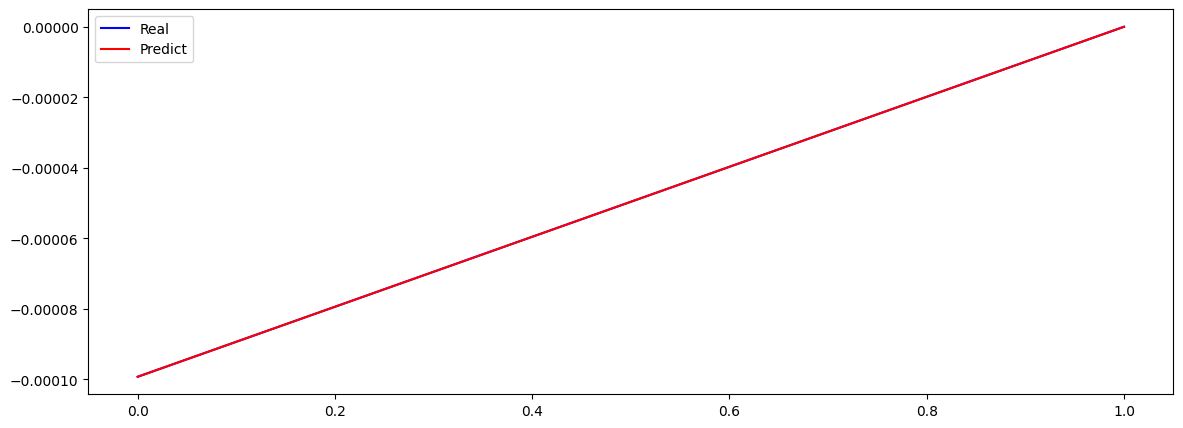

In [7]:
import tensorflow as tf
import os

os.environ["KERAS_BACKEND"] = "tensorflow"
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import sys
import json
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
from keras.applications.vgg16 import VGG16

# seq
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
from typing import List

import datetime
import time

data_path: str = "../datasets/currency/price_dollar_rl.json"


def read_data(path: str) -> pd.DataFrame:
    with open(path, "r") as f:
        data = json.loads(f.read())
    data = data["data"]
    dataset = []
    # reverse data
    data = data[::-1]
    le = len(data)
    for i in range(le):
        dataset.append(
            [
                int(data[i][0].replace(",", "", data[i][0].count(","))),
                int(data[i][1].replace(",", "", data[i][1].count(","))),
                int(data[i][2].replace(",", "", data[i][2].count(","))),
                int(data[i][3].replace(",", "", data[i][3].count(","))),
                (
                    1
                    - int(data[i][3].replace(",", "", data[i][3].count(",")))
                    / int(data[i + 1][3].replace(",", "", data[i + 1][3].count(",")))
                    if i < le - 1
                    else 0
                ),
                (
                    1
                    - int(data[i][1].replace(",", "", data[i][2].count(",")))
                    / int(data[i][2].replace(",", "", data[i][2].count(",")))
                    if i > 0
                    else 0
                ),
                datetime.datetime.strptime(data[i][6], "%Y/%m/%d"),
            ]
        )
    return pd.DataFrame(
        dataset,
        columns=["open", "low", "high", "close", "change", "change_in_day", "date"],
    )


df = read_data(data_path)


def create_dataset(
    data: pd.DataFrame,
    previous_days: int = 60,
    features: List[str] = ["change"],
    data_features: List[str] = "__all__",
    column_names: str = "day_%d",
) -> pd.DataFrame:
    if previous_days > len(data):
        raise ValueError("previous_days must be less than the length of the data")

    if data_features == "__all__":
        data_features = data.columns.tolist()

    output = []
    for j in range(previous_days, len(data) + 1):
        selected_features = data.iloc[j - previous_days : j, :][
            features
        ].values.flatten()
        additional_data = data.iloc[j - 1][data_features].values.tolist()
        output.append(list(selected_features) + additional_data)

    column_names_list = [
        column_names % (i + 1) for i in range(previous_days)
    ] + data_features
    return pd.DataFrame(output, columns=column_names_list)


previous_days = 2

ds = create_dataset(
    df,
    previous_days=previous_days,
    features=["change"],  # Make sure to provide features as a list
    data_features=["change"],
    column_names="day_%d",
)

from sklearn.preprocessing import StandardScaler

X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

X_train, X_test, y_train, y_test = (
    X[: len(X) - previous_days],
    X[len(X) - previous_days :],
    y[: len(X) - previous_days],
    y[len(X) - previous_days :],
)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(y_test, label="Real", color="blue")
plt.plot(predict, label="Predict", color="red")
plt.legend()
plt.show()

Mean Absolute Error: 1.4998565667584718e-18
Mean Squared Error: 3.3930367258948524e-36
R-squared: 1.0


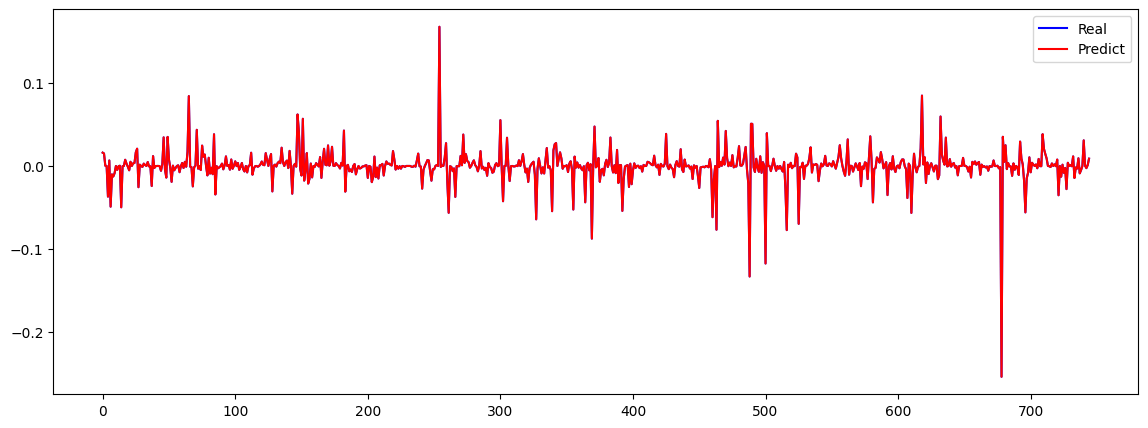

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(y_test, label="Real", color="blue")
plt.plot(predict, label="Predict", color="red")
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target variable (y)
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize features (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predict = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results if necessary

Mean Absolute Error: 6.98109774686304e-18
Mean Squared Error: 1.9760104216976105e-34
R-squared: 1.0
